<a href="https://colab.research.google.com/github/SergeyVelich/MashineLearning/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Copy images repo
!rm -rf ORLFaceRecognition-PCA
!git clone https://github.com/SilvesterHsu/ORLFaceRecognition-PCA.git

#Copy shape_predictor_68_face_landmarks.dat file
import urllib.request
urllib.request.urlretrieve('http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2', 'shape_predictor_68_face_landmarks.dat.bz2')

#Uncompress file
import bz2,shutil

with bz2.BZ2File("shape_predictor_68_face_landmarks.dat.bz2") as fr, open("shape_predictor_68_face_landmarks.dat","wb") as fw:
    shutil.copyfileobj(fr,fw)

Cloning into 'ORLFaceRecognition-PCA'...
remote: Enumerating objects: 604, done.
remote: Total 604 (delta 0), reused 0 (delta 0), pack-reused 604
Receiving objects: 100% (604/604), 3.59 MiB | 23.73 MiB/s, done.
Resolving deltas: 100% (93/93), done.


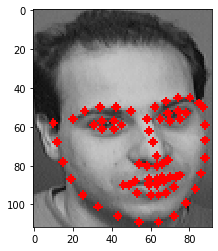

In [58]:
import cv2
import dlib
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
import os
import json 
import pdb;
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

# build folder's list
folders = []
root = os.path.join('ORLFaceRecognition-PCA','att_faces')

for i in os.walk(root):
  if i[0] != root:
    folders.append(i)
folders.sort()

images_matrix = []
# landmarkNumbers = range(0, 68)
landmarkNumbers = [36, 45]
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

for address, dirs, files in folders:
    files.sort(key=natural_keys) 
    for filename in files:
      
      filenameWithFolder = os.path.join(address.replace('ORLFaceRecognition-PCA/att_faces/',''),filename);
      img = cv2.imread(os.path.join(address,filename))
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)           
      faces = detector(img_gray)
      
      for face in faces:
        landmarks = predictor(img_gray, face)

        landmarkCoordinats = {}
        for landmarkNumber in landmarkNumbers:         
          landmarkCoordinats["x" + str(landmarkNumber)] = landmarks.part(landmarkNumber).x
          landmarkCoordinats["y" + str(landmarkNumber)] = landmarks.part(landmarkNumber).y  
          # cv2.circle(img, (landmarks.part(landmarkNumber).x, landmarks.part(landmarkNumber).y), 2, (255, 0, 0), -1)

        landmarkCoordinats["img"] = filenameWithFolder

        images_matrix.append(landmarkCoordinats)

      # plt.imshow(img)

with open("data_file.json", "w") as write_file:
    json.dump(images_matrix, write_file, indent=4, separators=(',',':'))